# Credit card categories recommendation

In [1]:
import pandas as pd
import numpy as np
from datatable import (dt, f, by, ifelse, update, sort, count, min, max, mean, sum, rowsum)

In [2]:
data = dt.fread('/Users/user/Desktop/tbrain_cc_training_48tags_hash_final.csv')
data.head()

,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,…,cuorg,slam,gender_code,age,primary_card
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,,▪▪▪▪,▪▪▪▪▪▪▪▪,▪,▪▪▪▪,▪
0,1,10321418,45,3,3891.97,3,0,0,0,1,…,30,95982.8,1,4,1
1,1,10414574,15,2,10616.6,2,0,0,0,1,…,30,130702,1,3,1
2,1,10134567,48,2,23527.7,0,2,0,0,0,…,30,112011,0,4,1
3,1,10001003,48,9,17751.6,7,2,0,0,0.75,…,30,59701.5,0,3,1
4,1,10267183,2,1,21701.3,1,0,0,0,1,…,30,NA,0,6,0
5,1,10256467,12,1,2397.28,1,0,0,0,1,…,30,95982.8,0,5,1
6,1,10209279,33,1,5773.04,1,0,0,0,1,…,30,100181,1,4,1
7,1,10122747,48,3,13290.4,1,2,0,0,0.16,…,30,68561.2,0,4,1
8,1,10118615,48,1,5773.04,1,0,0,0,1,…,30,87397.1,0,5,1


In [3]:
data.shape

(32975653, 53)

In [4]:
data.nunique()

,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,…,cuorg,slam,gender_code,age,primary_card
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,24,500000,49,334,124615,194,288,75,233,101,…,34,2643,2,9,2


- 24個月份
- 500000個不重複顧客
- 49個消費類別

In [5]:
data.names

('dt',
 'chid',
 'shop_tag',
 'txn_cnt',
 'txn_amt',
 'domestic_offline_cnt',
 'domestic_online_cnt',
 'overseas_offline_cnt',
 'overseas_online_cnt',
 'domestic_offline_amt_pct',
 'domestic_online_amt_pct',
 'overseas_offline_amt_pct',
 'overseas_online_amt_pct',
 'card_1_txn_cnt',
 'card_2_txn_cnt',
 'card_3_txn_cnt',
 'card_4_txn_cnt',
 'card_5_txn_cnt',
 'card_6_txn_cnt',
 'card_7_txn_cnt',
 'card_8_txn_cnt',
 'card_9_txn_cnt',
 'card_10_txn_cnt',
 'card_11_txn_cnt',
 'card_12_txn_cnt',
 'card_13_txn_cnt',
 'card_14_txn_cnt',
 'card_other_txn_cnt',
 'card_1_txn_amt_pct',
 'card_2_txn_amt_pct',
 'card_3_txn_amt_pct',
 'card_4_txn_amt_pct',
 'card_5_txn_amt_pct',
 'card_6_txn_amt_pct',
 'card_7_txn_amt_pct',
 'card_8_txn_amt_pct',
 'card_9_txn_amt_pct',
 'card_10_txn_amt_pct',
 'card_11_txn_amt_pct',
 'card_12_txn_amt_pct',
 'card_13_txn_amt_pct',
 'card_14_txn_amt_pct',
 'card_other_txn_amt_pct',
 'masts',
 'educd',
 'trdtp',
 'naty',
 'poscd',
 'cuorg',
 'slam',
 'gender_code',
 'a

In [6]:
data.ltypes

(ltype.int,
 ltype.int,
 ltype.str,
 ltype.int,
 ltype.real,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.real,
 ltype.bool,
 ltype.int,
 ltype.bool)

---
### Update 12/15

In [7]:
pd.set_option('display.float_format', lambda x:'%.2f' % x)

每月各類別商品統計

In [8]:
data_txn_amt = data[:, [sum(f.txn_amt), count(f.txn_cnt)], by('shop_tag', 'dt')].to_pandas()
data_txn_amt = data_txn_amt.sort_values(by=['txn_amt'])
data_txn_amt

,shop_tag,dt,txn_amt,txn_cnt
518,29,15,4497.40,1
524,29,21,12957.22,2
521,29,18,13109.67,2
508,29,5,13413.67,3
504,29,1,18195.05,3
...,...,...,...,...
177,16,10,25652559273809296796466143373647304348824765328...,31079
176,16,9,28588663246627469151828156040114563579973459383...,24867
173,16,6,45978621035751305973247026334781507780960686072...,23952
174,16,7,12024472778605509185534394899211439165968220099...,23308


In [9]:
data_txn_amt.shape

(1176, 4)

- 第32類商品在每個月消費金額幾乎都很低 <br>
- 第16類商品在每個月消費金額幾乎都很高

In [10]:
data_txn_amt_cnt = pd.DataFrame({
    'shop_tag': data_txn_amt['shop_tag'],
    'dt': data_txn_amt['dt'],
}, columns = ['shop_tag', 'dt', 'amt_per_c'])
data_txn_amt_cnt['amt_per_c'] = data_txn_amt['txn_amt']/data_txn_amt['txn_cnt']
data_txn_amt_cnt.sort_values(by=['amt_per_c'])

,shop_tag,dt,amt_per_c
613,32,14,2992.49
612,32,13,3145.93
614,32,15,3493.15
615,32,16,4334.45
508,29,5,4471.22
...,...,...,...
176,16,9,11496627356185896706978383174273163416884210187...
480,28,1,16757805471690723906634325481614340801341558263...
173,16,6,19196151067030436834086135156590210272955251318...
174,16,7,51589466185882570055384598015591424907031163284...


各類別商品統計

In [11]:
data_txn_amt = data[:, [sum(f.txn_amt), count(f.txn_cnt)], by('shop_tag')].to_pandas()
data_txn_amt = data_txn_amt.sort_values(by=['txn_amt'])

單位價格低的類別 <-> 單位價格高的類別 <br>
32, 47, 22, 7, 36, ..., 46, 39, 28, 16, 34

In [12]:
data_txn_amt_cnt = pd.DataFrame(data_txn_amt['shop_tag'], columns = ['shop_tag', 'amt_per_c'])
data_txn_amt_cnt['amt_per_c'] = data_txn_amt['txn_amt']/data_txn_amt['txn_cnt']
data_txn_amt_cnt = pd.merge(data_txn_amt, data_txn_amt_cnt, on = 'shop_tag')
data_txn_amt_cnt.sort_values(by=['amt_per_c'])

,shop_tag,txn_amt,txn_cnt,amt_per_c
9,32,1171221174.47,202863,5773.46
14,47,1469194613.61,225170,6524.82
22,22,3596792512.61,547293,6571.97
8,7,1070452088.08,160780,6657.87
36,36,18057637472.95,2550500,7080.04
24,31,4348448047.44,607888,7153.37
29,25,5715636153.33,795763,7182.59
15,5,1695812678.99,231969,7310.51
25,13,4742144581.70,625801,7577.72
6,42,712752249.52,91492,7790.32


---

## 各欄位

每月累積消費次數

<AxesSubplot:ylabel='Frequency'>

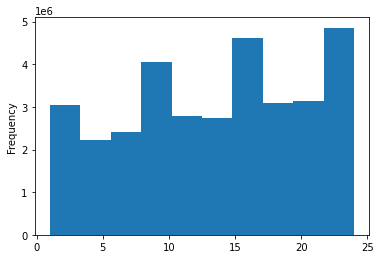

In [13]:
df_pd = data.to_pandas()
df_pd['dt'].plot.hist()

#### 各消費類別累積次數

<AxesSubplot:ylabel='Frequency'>

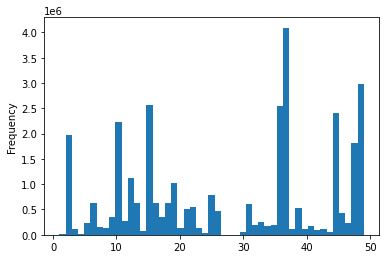

In [14]:
df_pd.loc[df_pd['shop_tag'] == 'other', 'shop_tag'] = '49' 
df_pd['shop_tag'].astype(int).plot.hist(bins=49)

需預測的類別共16種，2,6,10,12,13,15,18,19,21,22,25,26,36,37,39,48

##### txt_cnt 消費次數
36>37>10>...>4>28>29
##### txn_amt 消費金額（經過神秘轉換)
34>16>28>...>4>27>29


### 各欄位總和排序

In [15]:
df_pd.groupby(['shop_tag']).sum().rank()

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,...,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,age,primary_card
shop_tag,,,,,,,,,,,,,,,,,,,,,
1,5.00,5.00,5.00,4.00,10.00,6.00,17.00,3.00,10.00,6.00,...,7.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,5.00,5.00
10,44.00,44.00,47.00,44.00,25.00,48.00,47.00,49.00,17.00,49.00,...,45.00,44.00,44.00,44.00,44.00,44.00,44.00,39.00,44.00,44.00
11,26.00,26.00,24.00,29.00,30.00,21.00,16.00,38.00,31.00,22.00,...,25.00,26.00,26.00,26.00,26.00,26.00,26.00,32.50,26.00,26.00
12,41.00,41.00,39.00,34.00,35.00,41.00,33.00,32.00,36.00,45.00,...,40.00,41.00,41.00,41.00,41.00,41.00,41.00,31.00,41.00,41.00
13,38.00,35.00,41.00,26.00,15.00,44.00,21.00,48.00,9.00,41.00,...,33.00,38.00,35.00,36.00,35.00,34.00,36.00,14.00,30.00,34.00
14,9.00,9.00,8.00,6.00,16.00,12.00,23.00,14.00,16.00,12.00,...,8.00,9.00,9.00,9.00,9.00,9.00,9.00,8.00,9.00,9.00
15,46.00,47.00,46.00,40.00,47.00,45.00,48.00,45.00,47.00,44.00,...,44.00,46.00,47.00,47.00,47.00,47.00,47.00,48.50,47.00,46.00
16,34.00,36.00,36.00,48.00,40.00,30.00,14.00,24.00,39.00,31.00,...,37.00,34.00,38.00,35.00,36.00,36.00,35.00,18.00,38.00,38.00
17,27.00,27.00,26.00,27.00,26.00,36.00,3.00,3.00,26.00,39.00,...,29.00,27.00,28.00,27.00,27.00,28.00,27.00,10.00,28.00,28.00


### 各欄位總和原始資料

In [16]:
df_pd.groupby(['shop_tag']).sum()

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,...,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,age,primary_card
shop_tag,,,,,,,,,,,,,,,,,,,,,
1,248245.00,213149183690.00,30779.00,436876344.31,29662.00,321.00,796.00,0.00,20253.56,229.02,...,4610.95,31513.00,87275.00,194803.00,20800.00,716597.00,614884.00,2075899729.10,81515.00,20230
10,30726878.00,22899922110201.00,6904302.00,547835681584709959680.00,156981.00,3322018.00,73640.00,3351663.00,62173.80,1379051.36,...,236396.03,3543229.00,8009751.00,22524794.00,2238487.00,70867309.00,65960535.00,12721572823267090827109175114610734922120992574...,7623732.00,2060845
11,3735098.00,2874820190361.00,351167.00,5171063632.93,241662.00,86907.00,716.00,21882.00,204894.60,67718.56,...,29328.49,425926.00,1004482.00,2852414.00,280977.00,9156126.00,8266702.00,18247409905519324905316037755885991377257012738...,1020973.00,258074
12,15207507.00,11591665536017.00,1546614.00,10125973437.39,579334.00,949502.00,6351.00,11427.00,423751.79,694290.49,...,133190.70,1733705.00,4228616.00,11233935.00,1132658.00,37735944.00,33301274.00,70313578679266896652790546474404202477378165100...,4088309.00,1047004
13,10197849.00,6414901942120.00,3225938.00,4742144581.70,84584.00,1957478.00,1224.00,1182652.00,19830.07,379800.48,...,47015.69,1069437.00,2222579.00,6387934.00,627378.00,18689320.00,18514035.00,20694206485808128386159079113764701330559059570...,1802863.00,565815
14,1023706.00,753005607903.00,105413.00,610723821.39,86926.00,16767.00,1397.00,323.00,60887.14,11278.57,...,4913.73,112365.00,259825.00,743202.00,73673.00,2201350.00,2159019.00,206815501909876171434513502916177700564500480.00,266295.00,67488
15,35389851.00,26375818170241.00,6901123.00,22612723695.29,4592131.00,1991452.00,92529.00,225011.00,2030730.17,461409.53,...,227015.01,3954240.00,9080885.00,26550910.00,2579584.00,83964213.00,75811998.00,63097475289894848156890183315085187392624564639...,9124006.00,2342097
16,8120821.00,6447360205968.00,1112630.00,12024472783282414695697618236050642749069328760...,962948.00,147300.00,507.00,1875.00,535774.17,91230.53,...,70430.28,906997.00,2405559.00,6151978.00,629327.00,19781035.00,18498603.00,18987015439178355460935059164818401177214544069...,2420732.00,593505
17,4438340.00,3544717879537.00,448892.00,4989182174.67,180763.00,268129.00,0.00,0.00,136928.47,208885.58,...,35535.49,493484.00,1272581.00,3445325.00,346059.00,11048520.00,10172956.00,42428169739366398623984748273714693751180650631...,1338575.00,321587


### transaction 次數加總
各消費類別消費次數排名 <br>
37>49>15>36>45>...>24>1>4>27>28>29

In [17]:
df_pd.groupby(['shop_tag']).count()
# df_pd.groupby(['shop_tag']).count().rank()

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,...,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
shop_tag,,,,,,,,,,,,,,,,,,,,,
1,20800,20800,20800,20800,20800,20800,20800,20800,20800,20800,...,20800,20800,20800,20800,20800,20800,20361,20557,20557,20800
10,2234101,2234101,2234101,2234101,2234101,2234101,2234101,2234101,2234101,2234101,...,2234100,2234100,2234084,2234100,2234100,2234100,2123311,2204778,2204778,2234101
11,280455,280455,280455,280455,280455,280455,280455,280455,280455,280455,...,280455,280455,280453,280455,280455,280455,265729,275573,275573,280455
12,1130825,1130825,1130825,1130825,1130825,1130825,1130825,1130825,1130825,1130825,...,1130825,1130825,1130807,1130825,1130825,1130825,1077634,1115450,1115450,1130825
13,625801,625801,625801,625801,625801,625801,625801,625801,625801,625801,...,625801,625801,625791,625801,625801,625801,592339,618804,618804,625801
14,73457,73457,73457,73457,73457,73457,73457,73457,73457,73457,...,73457,73456,73457,73457,73457,73457,69360,72153,72153,73457
15,2573145,2573145,2573145,2573145,2573145,2573145,2573145,2573145,2573145,2573145,...,2573144,2573142,2573110,2573144,2573144,2573144,2426900,2539480,2539480,2573145
16,628987,628987,628987,628987,628987,628987,628987,628987,628987,628987,...,628987,628987,628969,628987,628987,628987,599527,620847,620847,628987
17,345814,345814,345814,345814,345814,345814,345814,345814,345814,345814,...,345813,345813,345811,345813,345813,345813,327622,340908,340908,345814


In [18]:
df_cor = df_pd.corr()

In [19]:
df_pd.corrwith(df_pd['txn_amt'])

dt                         -0.00
chid                       -0.00
txn_cnt                    -0.00
txn_amt                     1.00
domestic_offline_cnt       -0.00
domestic_online_cnt        -0.00
overseas_offline_cnt       -0.00
overseas_online_cnt        -0.00
domestic_offline_amt_pct    0.00
domestic_online_amt_pct    -0.00
overseas_offline_amt_pct   -0.00
overseas_online_amt_pct    -0.00
card_1_txn_cnt             -0.00
card_2_txn_cnt             -0.00
card_3_txn_cnt              0.00
card_4_txn_cnt             -0.00
card_5_txn_cnt             -0.00
card_6_txn_cnt             -0.00
card_7_txn_cnt             -0.00
card_8_txn_cnt             -0.00
card_9_txn_cnt             -0.00
card_10_txn_cnt            -0.00
card_11_txn_cnt            -0.00
card_12_txn_cnt            -0.00
card_13_txn_cnt            -0.00
card_14_txn_cnt            -0.00
card_other_txn_cnt         -0.00
card_1_txn_amt_pct         -0.00
card_2_txn_amt_pct         -0.00
card_3_txn_amt_pct          0.00
card_4_txn

In [20]:
df_cor

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,...,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,age,primary_card
dt,1.00,0.00,0.03,-0.00,-0.03,0.06,-0.05,0.01,-0.11,0.12,...,-0.02,0.04,-0.01,-0.01,0.00,-0.03,0.01,-0.00,-0.08,0.00
chid,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00
txn_cnt,0.03,0.00,1.00,-0.00,0.41,0.77,0.05,0.35,-0.12,0.11,...,-0.03,0.03,-0.02,-0.01,0.00,-0.02,0.00,-0.00,-0.05,0.00
txn_amt,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,NaN,0.00,0.00
domestic_offline_cnt,-0.03,0.00,0.41,-0.00,1.00,-0.11,-0.03,-0.07,0.43,-0.36,...,0.03,-0.06,0.02,0.01,0.00,0.03,-0.00,-0.00,0.10,-0.01
domestic_online_cnt,0.06,0.00,0.77,-0.00,-0.11,1.00,-0.01,-0.00,-0.34,0.39,...,-0.05,0.06,-0.04,-0.02,-0.00,-0.04,0.00,0.00,-0.10,0.01
overseas_offline_cnt,-0.05,0.00,0.05,-0.00,-0.03,-0.01,1.00,0.02,-0.08,-0.04,...,-0.01,0.01,-0.00,0.01,0.01,0.01,-0.00,-0.00,-0.02,-0.03
overseas_online_cnt,0.01,0.00,0.35,-0.00,-0.07,-0.00,0.02,1.00,-0.17,-0.05,...,0.00,0.04,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.05,-0.01
domestic_offline_amt_pct,-0.11,-0.00,-0.12,0.00,0.43,-0.34,-0.08,-0.17,1.00,-0.86,...,0.06,-0.14,0.07,0.02,-0.00,0.06,-0.01,-0.00,0.22,-0.00
domestic_online_amt_pct,0.12,0.00,0.11,-0.00,-0.36,0.39,-0.04,-0.05,-0.86,1.00,...,-0.07,0.10,-0.07,-0.02,-0.01,-0.07,0.01,0.00,-0.18,0.02


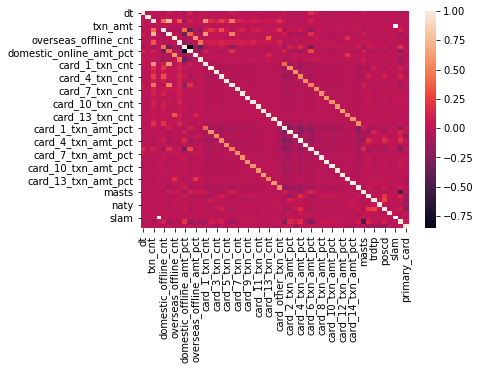

In [21]:
import seaborn as sns
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(df_cor)